### Case 1

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pulp

%matplotlib inline

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [4]:
centers_df = pd.read_csv("centers.csv")
centers_df.head(5)

,Center,Opening Costs,Operating Costs,Num MPs,Maximum capacity
0,Center A,0,275000,215,5000000
1,Center B,0,275000,125,5000000
2,Center C,0,275000,100,5000000
3,Center D,0,285000,120,5000000
4,Center E,250000,125000,0,5000000


In [5]:
demands_df = pd.read_csv("demands.csv")
demands_df.head(5)

,Year,Region,Demand
0,2012,Downtown Toronto,249581
1,2012,East York,172730
2,2012,Etobicoke,285764
3,2012,Mississauga East,255427
4,2012,North Toronto,263276


In [6]:
distances_df = pd.read_csv("distances.csv")
#distances_df = pd.read_csv("distances.csv", index_col=0)
distances_df.head(5)

,Center,Region,Distance
0,Center A,Downtown Toronto,25.77
1,Center A,East York,2.24
2,Center A,Etobicoke,25.72
3,Center A,Mississauga East,28.65
4,Center A,North Toronto,11.64


### 1a. Plots for Year vs Demand

In [7]:
demands_pivot = demands_df.pivot("Year", "Region", "Demand")
demands_pivot.head()

Region,Downtown Toronto,East York,Etobicoke,Mississauga East,North Toronto,North York,Scarborough East
Year,,,,,,,
2012,249581,172730,285764,255427,263276,316579,281067
2013,262099,180925,300093,268385,276262,332967,294825
2014,275303,190090,315534,281839,289976,349748,309148
2015,288823,199759,331551,296252,304239,367578,324078
2016,302692,209598,348169,310699,318926,386781,340914


<AxesSubplot:xlabel='Year'>

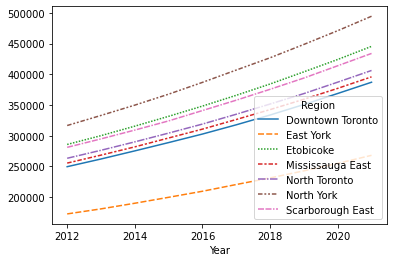

In [8]:
sns.lineplot(data = demands_pivot)

I would forecast demand using historic data to build a timeseries model 

### 1b. Determinimistic model

##### Averages of demand per regins

In [9]:
# Picking the average
z = demands_df["Demand"].mean()
z

327882.7571428571

In [10]:
avg_df = demands_df.groupby('Region').mean()
avg_df.reset_index(inplace=True)
avg_df

,Region,Year,Demand
0,Downtown Toronto,2016.5,313634.1
1,East York,2016.5,217075.1
2,Etobicoke,2016.5,360431.0
3,Mississauga East,2016.5,321349.3
4,North Toronto,2016.5,330098.3
5,North York,2016.5,400108.9
6,Scarborough East,2016.5,352482.6


<AxesSubplot:xlabel='Region', ylabel='Demand'>

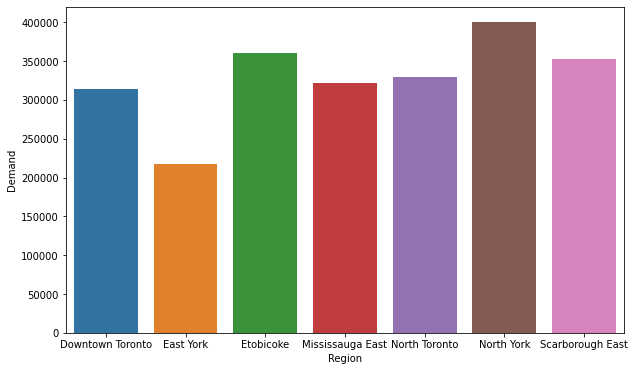

In [11]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='Region', y='Demand', ax= ax, data=avg_df)

### Sk learn Linear Regression

In [12]:
# Importing Linear regression from sklearn 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Fitting LR on training data and predicting for 2022-2024

##### A. Downtown Toronto


In [13]:
region = demands_df[(demands_df['Region'] == 'Downtown Toronto')]

In [14]:
#demands_downtown_toronto = demands_downtown_toronto.drop('Region', axis=1)

region
X = region[['Year']] 
Y = region[['Demand']]
X,Y
#type(X)


# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X,Y)


# Predicting the Test set results
y_pred = regressor.predict(X)
y_pred


# Predicting the Test set results
y_pred = regressor.predict(X)
y_pred

test_years = np.arange(2022, 2025, 1)
df_test= pd.DataFrame(test_years)
#type(test_years),type(df_test)

test_results= regressor.predict(df_test)
test_results

/Users/asadtariq/opt/anaconda3/envs/env-IDS2020/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[397295.66666667],
       [412506.86060606],
       [427718.05454545]])

In [15]:
type(test_results)

numpy.ndarray

In [16]:
test_results_df = pd.DataFrame(test_results.astype(int))
test_results_df.insert(0, "Year", [2022, 2023, 2024], True)
test_results_df.insert(1, "Region", ['Downtown Toronto','Downtown Toronto','Downtown Toronto'], True)
test_results_df


,Year,Region,0
0,2022,Downtown Toronto,397295
1,2023,Downtown Toronto,412506
2,2024,Downtown Toronto,427718


##### B. East York

In [17]:
region = demands_df[(demands_df['Region'] == 'East York')]

In [18]:
#demands_downtown_toronto = demands_downtown_toronto.drop('Region', axis=1)

region
X = region[['Year']] 
Y = region[['Demand']]
X,Y
#type(X)


# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X,Y)


# Predicting the Test set results
y_pred = regressor.predict(X)
y_pred


# Predicting the Test set results
y_pred = regressor.predict(X)
y_pred

test_years = np.arange(2022, 2025, 1)
df_test= pd.DataFrame(test_years)
#type(test_years),type(df_test)

test_results= regressor.predict(df_test)
test_results

/Users/asadtariq/opt/anaconda3/envs/env-IDS2020/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[275250.8],
       [285828.2],
       [296405.6]])

In [19]:
type(test_results)

numpy.ndarray

In [20]:
test_results_df = pd.DataFrame(test_results.astype(int))
test_results_df.insert(0, "Year", [2022, 2023, 2024], True)
test_results_df.insert(1, "Region", ['East York','East York','East York'], True)
test_results_df


,Year,Region,0
0,2022,East York,275250
1,2023,East York,285828
2,2024,East York,296405


##### C. Etobicoke

In [21]:
region = demands_df[(demands_df['Region'] == 'Etobicoke')]

In [22]:
#demands_downtown_toronto = demands_downtown_toronto.drop('Region', axis=1)

region
X = region[['Year']] 
Y = region[['Demand']]
X,Y
#type(X)


# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X,Y)


# Predicting the Test set results
y_pred = regressor.predict(X)
y_pred


# Predicting the Test set results
y_pred = regressor.predict(X)
y_pred

test_years = np.arange(2022, 2025, 1)
df_test= pd.DataFrame(test_years)
#type(test_years),type(df_test)

test_results= regressor.predict(df_test)
test_results

/Users/asadtariq/opt/anaconda3/envs/env-IDS2020/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[457808.06666666],
       [475512.98787878],
       [493217.90909091]])

In [23]:
type(test_results)

numpy.ndarray

In [24]:
test_results_df = pd.DataFrame(test_results.astype(int))
test_results_df.insert(0, "Year", [2022, 2023, 2024], True)
test_results_df.insert(1, "Region", ['Etobicoke','Etobicoke','Etobicoke'], True)
test_results_df


,Year,Region,0
0,2022,Etobicoke,457808
1,2023,Etobicoke,475512
2,2024,Etobicoke,493217


##### D. Mississauga East

In [25]:
region = demands_df[(demands_df['Region'] == 'Mississauga East')]

In [26]:
#demands_downtown_toronto = demands_downtown_toronto.drop('Region', axis=1)

region
X = region[['Year']] 
Y = region[['Demand']]
X,Y
#type(X)


# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X,Y)


# Predicting the Test set results
y_pred = regressor.predict(X)
y_pred


# Predicting the Test set results
y_pred = regressor.predict(X)
y_pred

test_years = np.arange(2022, 2025, 1)
df_test= pd.DataFrame(test_years)
#type(test_years),type(df_test)

test_results= regressor.predict(df_test)
test_results

/Users/asadtariq/opt/anaconda3/envs/env-IDS2020/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[406851.4       ],
       [422397.23636363],
       [437943.07272727]])

In [27]:
type(test_results)

numpy.ndarray

In [28]:
test_results_df = pd.DataFrame(test_results.astype(int))
test_results_df.insert(0, "Year", [2022, 2023, 2024], True)
test_results_df.insert(1, "Region", ['Mississauga East','Mississauga East','Mississauga East'], True)
test_results_df


,Year,Region,0
0,2022,Mississauga East,406851
1,2023,Mississauga East,422397
2,2024,Mississauga East,437943


##### E. North Toronto

In [29]:
region = demands_df[(demands_df['Region'] == 'North Toronto')]

In [30]:
#demands_downtown_toronto = demands_downtown_toronto.drop('Region', axis=1)

region
X = region[['Year']] 
Y = region[['Demand']]
X,Y
#type(X)


# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X,Y)


# Predicting the Test set results
y_pred = regressor.predict(X)
y_pred


# Predicting the Test set results
y_pred = regressor.predict(X)
y_pred

test_years = np.arange(2022, 2025, 1)
df_test= pd.DataFrame(test_years)
#type(test_years),type(df_test)

test_results= regressor.predict(df_test)
test_results

/Users/asadtariq/opt/anaconda3/envs/env-IDS2020/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[417190.2       ],
       [433025.09090909],
       [448859.98181818]])

In [31]:
type(test_results)

numpy.ndarray

In [32]:
test_results_df = pd.DataFrame(test_results.astype(int))
test_results_df.insert(0, "Year", [2022, 2023, 2024], True)
test_results_df.insert(1, "Region", ['North Toronto','North Toronto','North Toronto'], True)
test_results_df


,Year,Region,0
0,2022,North Toronto,417190
1,2023,North Toronto,433025
2,2024,North Toronto,448859


##### F. North York

In [33]:
region = demands_df[(demands_df['Region'] == 'North York')]

In [34]:
#demands_downtown_toronto = demands_downtown_toronto.drop('Region', axis=1)

region
X = region[['Year']] 
Y = region[['Demand']]
X,Y
#type(X)


# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X,Y)


# Predicting the Test set results
y_pred = regressor.predict(X)
y_pred


# Predicting the Test set results
y_pred = regressor.predict(X)
y_pred

test_years = np.arange(2022, 2025, 1)
df_test= pd.DataFrame(test_years)
#type(test_years),type(df_test)

test_results= regressor.predict(df_test)
test_results

/Users/asadtariq/opt/anaconda3/envs/env-IDS2020/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[508686.46666666],
       [528427.84242424],
       [548169.21818182]])

In [35]:
type(test_results)

numpy.ndarray

In [36]:
test_results_df = pd.DataFrame(test_results.astype(int))
test_results_df.insert(0, "Year", [2022, 2023, 2024], True)
test_results_df.insert(1, "Region", ['North York','North York','North York'], True)
test_results_df


,Year,Region,0
0,2022,North York,508686
1,2023,North York,528427
2,2024,North York,548169


##### G. Scarborough East

In [37]:
region = demands_df[(demands_df['Region'] == 'Scarborough East')]

In [38]:
#demands_downtown_toronto = demands_downtown_toronto.drop('Region', axis=1)

region
X = region[['Year']] 
Y = region[['Demand']]
X,Y
#type(X)


# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X,Y)


# Predicting the Test set results
y_pred = regressor.predict(X)
y_pred


# Predicting the Test set results
y_pred = regressor.predict(X)
y_pred

test_years = np.arange(2022, 2025, 1)
df_test= pd.DataFrame(test_years)
#type(test_years),type(df_test)

test_results= regressor.predict(df_test)
test_results

/Users/asadtariq/opt/anaconda3/envs/env-IDS2020/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[445900.8       ],
       [462885.92727273],
       [479871.05454545]])

In [39]:
type(test_results)

numpy.ndarray

In [40]:
test_results_df = pd.DataFrame(test_results.astype(int))
test_results_df.insert(0, "Year", [2022, 2023, 2024], True)
test_results_df.insert(1, "Region", ['Scarborough East','Scarborough East','Scarborough East'], True)
test_results_df


,Year,Region,0
0,2022,Scarborough East,445900
1,2023,Scarborough East,462885
2,2024,Scarborough East,479871


In [41]:
#Data set with demand and predictions combined for all regions

In [43]:
demandsupto2024_df = pd.read_excel("demandsupto2024.xlsx")

<AxesSubplot:>

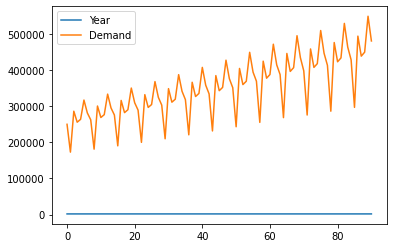

In [44]:
demandsupto2024_df.plot()

<AxesSubplot:xlabel='Year'>

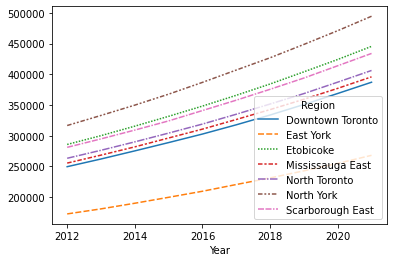

In [45]:
demandsupto2024_pivot = demandsupto2024_df.pivot("Year", "Region", "Demand")
demandsupto2024_pivot.head()

sns.lineplot(data = demands_pivot)

# Question 2 

### Sets

In [46]:
# Medical Center #used to be depots
medicalcenters = list(centers_df.index)
nummedicalcenters = len(medicalcenters)
nummedicalcenters #number of potential facility locations considered


# Demand Regions #used to be demand zones
regions = list(demands_df["Region"].unique())
numregions = len(regions)
numregions #number of potential demand regions considered

7

In [47]:
# temp = demands_df.set_index("Region")
# temp

### Input Parameters

In [48]:
# Demand in each region (dictionary)
regiondemand = {}
for j in regions:
    regiondemand[j] = demandsupto2024_df.loc[(demandsupto2024_df["Year"] == 2022)&(demandsupto2024_df["Region"] == j)]["Demand"]

    ### CAPACITY
# Medical center capacities (dictionary)
# 6 pieces of data
medicalcentercapacity = {}
for i in medicalcenters:
    medicalcentercapacity[i] = int(centers_df.loc[i]["Maximum capacity"])
    
# Employee capacity of one medical center
employee_hour_capacity_per_center = {}
for i in medicalcenters:
    employee_hour_capacity_per_center[i] = int(centers_df.loc[i]["Num MPs"]*250*6)

    ### FIXED COST
# Medical center costs (dictionary)
medicalcenterfixedcost = {}
for i in medicalcenters:
    medicalcenterfixedcost[i] = float(centers_df.loc[i]["Opening Costs"] +  centers_df.loc[i]["Operating Costs"])
    
    ### VARIABLE COST
# HP distance cost
two_way_distance_cost_per_km = 0.25*2

#6*7 = 42 pieces of data
hp_cost_from_center_to_region= {} #cij(cost of producing and shipping/cost incurred during flow)
for i in medicalcenters:
    for j in regions:
        hp_cost_from_center_to_region[(i,j)] = distances_df[(distances_df["Center"] == i)&(distances_df["Region"] == j)]["Distance"]*two_way_distance_cost_per_km + (56775) 


In [49]:
#calculating salary 

# salary_2022 = int(37.85*6*250)
# print(salary_2022 , "is the 2022 salary")
# salary_2023 = int(salary_2022*1.025)
# print(salary_2023 , "is the 2023 salary")
# salary_2024 = int(salary_2023*1.05)
# print(salary_2024 , "is the 2024 salary")

### Decision Variables

In [50]:
# Variables: if a medical center is opened/allocated
yvar = pulp.LpVariable.dict("y", medicalcenters, cat=pulp.LpBinary)
#binary variable, y is 1 if facility is open, 0 otherwise

# Variables: amount of demand allocated to each reagion by hp, per scenario
xvar = pulp.LpVariable.dict("x", (medicalcenters, regions), lowBound=0.0, cat=pulp.LpContinuous)
# continious variable, demand filled by facility i allocated by hp to region j


### Model initialization


In [51]:
# Initialize model and objective sense
locationModel = pulp.LpProblem(name="MedicalCenterLocationModel", sense=pulp.LpMinimize)

### Constraints

In [52]:
# Contraint: demand must be satisfied in all scenarios
for j in regions:
    locationModel += pulp.lpSum( [xvar[(i,j)] for i in medicalcenters] ) == regiondemand[j]

# Constraint: Medical centers capacities must be observed in all scenarios
for i in medicalcenters:        
    locationModel += pulp.lpSum( [xvar[(i,j)] for j in regions] ) <= medicalcentercapacity[i] * yvar[i]

In [53]:
employee_hour_capacity_per_center

{0: 322500, 1: 187500, 2: 150000, 3: 180000, 4: 0, 5: 0}

### Objective function

In [54]:
# Objective function (MINIMIZE TOTAL COST)

# --- medical center fixed costs (FIXED COST)
obj = pulp.lpSum([ medicalcenterfixedcost[i] * yvar[i] for i in medicalcenters])
#How much does it cost if I operate facility(medical center)* do I operate it (yes or no)


# --- hp flow cost- used to be package flow costs (VARIABLE COST)
obj += pulp.lpSum( [ hp_cost_from_center_to_region[(i,j)] * xvar[(i,j)] for i in medicalcenters for j in regions ] )

# add objective to model
locationModel += obj


### Solution process

In [55]:
# Write LP to file (optional, but often good to inspect model and find errors)
locationModel.writeLP("locationModel.lp")

# Solve model
locationModel.solve()
print("Status:", pulp.LpStatus[locationModel.status])

Status: Optimal


In [56]:
# Total cost
totalCost = pulp.value(locationModel.objective)
print("Total cost: " + str(totalCost))

Total cost: 275000.0


In [57]:
# Print solution (you can add to the dataframe if needed)
for i in medicalcenters:
    if yvar[i].varValue >= 1.0:
        print("medical center " + str(i) + " is opened")                            
        for j in regions:
            if xvar[(i,j)].varValue > 0.0:
                print("\t\tServes zone " + str(j) + " - with capacity " + str(xvar[(i,j)].varValue))

medical center 5 is opened
		Serves zone Downtown Toronto - with capacity 397295.0
		Serves zone East York - with capacity 275250.0
		Serves zone Etobicoke - with capacity 457808.0
		Serves zone Mississauga East - with capacity 406851.0
		Serves zone North Toronto - with capacity 417190.0
		Serves zone North York - with capacity 508686.0
		Serves zone Scarborough East - with capacity 445900.0


# Question 3 

### Sets

In [58]:
# Medical Center #used to be depots
medicalcenters = list(centers_df.index)
nummedicalcenters = len(medicalcenters)
nummedicalcenters #number of potential facility locations considered


# Demand Regions #used to be demand zones
regions = list(demands_df["Region"].unique())
numregions = len(regions)
numregions #number of potential demand regions considered

periods = ['2022', '2023', '2024']

In [59]:
# temp = demands_df.set_index("Region")
# temp

### Input Parameters

In [60]:
# # Demand in each region (dictionary)
# regiondemand = {}
# for j in regions:
#     regiondemand[j] = demandsupto2024_df.loc[(demandsupto2024_df["Year"].isin([2022, 2023, 2024]))&(demandsupto2024_df["Region"] == j)]["Demand"]

#     ### CAPACITY
# # Medical center capacities (dictionary)
# # 6 pieces of data
# medicalcentercapacity = {}
# for i in medicalcenters:
#     medicalcentercapacity[i] = int(centers_df.loc[i]["Maximum capacity"])
    
# # Employee capacity of one medical center (employee supply)
# employee_hour_capacity_per_center = {}
# for i in medicalcenters:
#     employee_hour_capacity_per_center[i] = int(centers_df.loc[i]["Num MPs"]*250*6)

#     ### FIXED COST
# # Medical center costs (dictionary)
# medicalcenterfixedcost = {}
# for i in medicalcenters:
#     medicalcenterfixedcost[i] = float(centers_df.loc[i]["Opening Costs"] +  centers_df.loc[i]["Operating Costs"])
    
#     ### VARIABLE COST
# # HP distance cost
# two_way_distance_cost_per_km = 0.25*2

# #6*7 = 42 pieces of data
# hp_cost_from_center_to_region= {} #cij(cost of producing and shipping/cost incurred during flow)
# for i in medicalcenters:
#     for j in regions:
#         hp_cost_from_center_to_region[(i,j)] = distances_df[(distances_df["Center"] == i)&(distances_df["Region"] == j)]["Distance"]*two_way_distance_cost_per_km 
        
# #Salary cost
# hp_yearly_salary = {
#   2022: 56775,
#   2023: 58194,
#   2024: 61103}


In [61]:
# Demand in each region (dictionary)
regiondemand = {}
for j in regions:
    regiondemand[j] = demandsupto2024_df.loc[(demandsupto2024_df["Year"].isin([2022, 2023, 2024]))&(demandsupto2024_df["Region"] == j)]["Demand"]

    ### CAPACITY
# Medical center capacities (dictionary)
# 6 pieces of data
medicalcentercapacity = {}
for i in medicalcenters:
    medicalcentercapacity[i] = int(centers_df.loc[i]["Maximum capacity"])
    
# Employee capacity of one medical center (employee supply)
employee_hour_capacity_per_center = {}
for i in medicalcenters:
    employee_hour_capacity_per_center[i] = int(centers_df.loc[i]["Num MPs"]*250*6)

    ### FIXED COST
# Medical center costs (dictionary) 
medicalcenterfixedcost = {}
for i in medicalcenters:
    medicalcenterfixedcost[i] = float(centers_df.loc[i]["Opening Costs"] +  centers_df.loc[i]["Operating Costs"])
    
    ### VARIABLE COST
# HP distance cost
two_way_distance_cost_per_km = 0.25*2

#6*7 = 42 pieces of data
hp_cost_from_center_to_region= {} #cij(cost of producing and shipping/cost incurred during flow)
for i in medicalcenters:
    for j in regions:
        hp_cost_from_center_to_region[(i,j)] = distances_df[(distances_df["Center"] == i)&(distances_df["Region"] == j)]["Distance"]*two_way_distance_cost_per_km 
        
#Salary cost
hp_yearly_salary = {
  '2022': 56775,
  '2023': 58194,
  '2024': 61103}


In [62]:
# sal_df = pd.DataFrame ({'Period': [2022, 2023, 2023], 'Salary':[56775,58194,61103]})
# sal_df.set_index("Period")

In [63]:
# hp_yearly_salary[1] = sal_df.loc[1]["Salary"]
# hp_yearly_salary[1]

In [64]:

# salary_2022 = int(37.85*6*250)
# print(salary_2022 , "is the 2022 salary")
# salary_2023 = int(salary_2022*1.025)
# print(salary_2023 , "is the 2023 salary")
# salary_2024 = int(salary_2023*1.05)
# print(salary_2024 , "is the 2024 salary")

### Decision Variables

In [65]:
# Variables: if a medical center is opened/allocated
yvar = pulp.LpVariable.dict("y", medicalcenters, cat=pulp.LpBinary)
#binary variable, y is 1 if facility is open, 0 otherwise

# Variables: amount of demand allocated to each reagion by hp, per scenario
xvar = pulp.LpVariable.dict("x", (medicalcenters, regions), lowBound=0.0, cat=pulp.LpContinuous)
# continious variable, demand filled by facility i allocated by hp to region j


### Model initialization


In [66]:
# Initialize model and objective sense
locationModel = pulp.LpProblem(name="MedicalCenterLocationModel", sense=pulp.LpMinimize)

### Constraints

In [67]:
# Contraint: demand must be satisfied in all scenarios
for j in regions:
    locationModel += pulp.lpSum( [xvar[(i,j)] for i in medicalcenters] ) == regiondemand[j]

# Constraint: Medical centers capacities must be observed in all scenarios
for i in medicalcenters:        
    locationModel += pulp.lpSum( [xvar[(i,j)] for j in regions] ) <= medicalcentercapacity[i] * yvar[i]

### Objective function

In [68]:
# Objective function (MINIMIZE TOTAL COST)

# --- medical center fixed costs (FIXED COST)
obj = pulp.lpSum([ medicalcenterfixedcost[i] * yvar[i] for i in medicalcenters])
#How much does it cost if I operate facility(medical center)* do I operate it (yes or no)


# --- hp flow cost- used to be package flow costs (VARIABLE COST)
obj += pulp.lpSum( [ hp_cost_from_center_to_region[(i,j)]  * xvar[(i,j)] for i in medicalcenters for j in regions] )

#obj += pulp.lpSum( [hp_yearly_salary[(t)]  * xvar[(t)] for t in periods] )

# add objective to model
locationModel += obj


# BUG - adding t to the obj function is breaking it 

In [69]:
obj += pulp.lpSum( [ hp_cost_from_center_to_region[(i,j,t)]  * xvar[(i,j,t)] for i in medicalcenters for j in regions for t in periods])

KeyError: (0, 'Downtown Toronto', '2022')

In [70]:
for i in medicalcenters:
    for j in regions:
        for t in periods: 
            print(hp_yearly_salary[(i,j,t)] * xvar[(i,j,t)])

KeyError: (0, 'Downtown Toronto', '2022')

In [71]:
hp_cost_from_center_to_region

{(0, 'Downtown Toronto'): Series([], Name: Distance, dtype: float64),
 (0, 'East York'): Series([], Name: Distance, dtype: float64),
 (0, 'Etobicoke'): Series([], Name: Distance, dtype: float64),
 (0, 'Mississauga East'): Series([], Name: Distance, dtype: float64),
 (0, 'North Toronto'): Series([], Name: Distance, dtype: float64),
 (0, 'North York'): Series([], Name: Distance, dtype: float64),
 (0, 'Scarborough East'): Series([], Name: Distance, dtype: float64),
 (1, 'Downtown Toronto'): Series([], Name: Distance, dtype: float64),
 (1, 'East York'): Series([], Name: Distance, dtype: float64),
 (1, 'Etobicoke'): Series([], Name: Distance, dtype: float64),
 (1, 'Mississauga East'): Series([], Name: Distance, dtype: float64),
 (1, 'North Toronto'): Series([], Name: Distance, dtype: float64),
 (1, 'North York'): Series([], Name: Distance, dtype: float64),
 (1, 'Scarborough East'): Series([], Name: Distance, dtype: float64),
 (2, 'Downtown Toronto'): Series([], Name: Distance, dtype: float6

### Solution process

In [72]:
# Write LP to file (optional, but often good to inspect model and find errors)
locationModel.writeLP("locationModel.lp")

# Solve model
locationModel.solve()
print("Status:", pulp.LpStatus[locationModel.status])

Status: Optimal


In [73]:
# Total cost
totalCost = pulp.value(locationModel.objective)
print("Total cost: " + str(totalCost))

Total cost: 550000.0


In [74]:
# Print solution (you can add to the dataframe if needed)
for i in medicalcenters:
    if yvar[i].varValue >= 1.0:
        print("medical center " + str(i) + " is opened")                            
        for j in regions:
            if xvar[(i,j)].varValue > 0.0:
                print("\t\tServes zone " + str(j) + " - with capacity " + str(xvar[(i,j)].varValue))

medical center 0 is opened
		Serves zone Downtown Toronto - with capacity 1237519.0
		Serves zone East York - with capacity 857483.0
		Serves zone Etobicoke - with capacity 1426537.0
		Serves zone Mississauga East - with capacity 540203.0
medical center 2 is opened
		Serves zone Mississauga East - with capacity 726988.0
		Serves zone North Toronto - with capacity 1299074.0
		Serves zone North York - with capacity 1585282.0
		Serves zone Scarborough East - with capacity 1388656.0


# Question 4

### Sets

In [76]:
# Medical Center #used to be depots
medicalcenters = list(centers_df.index)
nummedicalcenters = len(medicalcenters)
nummedicalcenters #number of potential facility locations considered


# Demand Regions #used to be demand zones
regions = list(demands_df["Region"].unique())
numregions = len(regions)
numregions #number of potential demand regions considered

periods = [2022, 2023, 2024]

# Number of employees 
employees = list(centers_df["Num MPs"])
numemployees = len(employees)
numemployees #number of potential employees

6

### Input Parameters

In [77]:
# Demand in each region (dictionary)
regiondemand = {}
for j in regions:
    regiondemand[j] = demandsupto2024_df.loc[(demandsupto2024_df["Year"].isin([2022, 2023, 2024]))&(demandsupto2024_df["Region"] == j)]["Demand"]

    ### CAPACITY
# Medical center capacities (dictionary)
# 6 pieces of data
medicalcentercapacity = {}
for i in medicalcenters:
    medicalcentercapacity[i] = int(centers_df.loc[i]["Maximum capacity"])
    
# Employee capacity of one medical center
employee_hour_capacity_per_center = {}
for i in medicalcenters:
    employee_hour_capacity_per_center[i] = int(centers_df.loc[i]["Num MPs"]*250*6)

    ### FIXED COST
# Medical center costs (dictionary)
medicalcenterfixedcost = {}
for i in medicalcenters:
    medicalcenterfixedcost[i] = float(centers_df.loc[i]["Opening Costs"] +  centers_df.loc[i]["Operating Costs"])
    
    ### VARIABLE COST
# HP distance cost
two_way_distance_cost_per_km = 0.25*2

#6*7 = 42 pieces of data
hp_cost_from_center_to_region= {} #cij(cost of producing and shipping/cost incurred during flow)
for i in medicalcenters:
    for j in regions:
        hp_cost_from_center_to_region[(i,j)] = distances_df[(distances_df["Center"] == i)&(distances_df["Region"] == j)]["Distance"]*two_way_distance_cost_per_km 
        
#Salary cost
hp_yearly_salary = {
  "2022": "56775",
  "2023": "58194",
  "2024": "61103"}


### Decision Variables

In [78]:
# Variables: if a medical center is opened/allocated
yvar = pulp.LpVariable.dict("y", medicalcenters, cat=pulp.LpBinary)
#binary variable, y is 1 if facility is open, 0 otherwise

# Variables: amount of demand allocated to each reagion by hp, per scenario
xvar = pulp.LpVariable.dict("x", (medicalcenters, regions), lowBound=0.0, cat=pulp.LpContinuous)
# continious variable, demand filled by facility i allocated by hp to region j

#Variables: Numbers of hires
hvar = pulp.LpVariable.dict("h", (employees), lowBound=0.0, upBound=300, cat=pulp.LpInteger)

### Model initialization


In [79]:
# Initialize model and objective sense
locationModel = pulp.LpProblem(name="MedicalCenterLocationModel", sense=pulp.LpMinimize)

### Constraints

In [80]:
# Contraint: demand must be satisfied in all scenarios
for j in regions:
    locationModel += pulp.lpSum( [xvar[(i,j)] for i in medicalcenters] ) == regiondemand[j]

# Constraint: Medical centers capacities must be observed in all scenarios
for i in medicalcenters:        
    locationModel += pulp.lpSum( [xvar[(i,j)] for j in regions] ) <= medicalcentercapacity[i] * yvar[i]
    
# # Constraint: HP capacities must be observed in all scenarios
for i in medicalcenters:        
    locationModel += pulp.lpSum( [xvar[(i,j)] for j in regions] ) <= employee_hour_capacity_per_center[i] + (300*250*6) #or hvar[i]     

### Objective function

In [81]:
# Objective function (MINIMIZE TOTAL COST)

# --- medical center fixed costs (FIXED COST)
obj = pulp.lpSum([ medicalcenterfixedcost[i]+((((salary[t])))) * yvar[i] for i in medicalcenters])
#How much does it cost if I operate facility(medical center)* do I operate it (yes or no)


# --- hp flow cost- used to be package flow costs (VARIABLE COST)
obj += pulp.lpSum( [ hp_cost_from_center_to_region[(i,j)] * xvar[(i,j)] for i in medicalcenters for j in regions ] )

# add objective to model
locationModel += obj


NameError: name 'salary' is not defined

### Solution process

In [82]:
# Write LP to file (optional, but often good to inspect model and find errors)
locationModel.writeLP("locationModel.lp")

# Solve model
locationModel.solve()
print("Status:", pulp.LpStatus[locationModel.status])

Status: Infeasible


In [83]:
# Total cost
totalCost = pulp.value(locationModel.objective)
print("Total cost: " + str(totalCost))

AttributeError: 'NoneType' object has no attribute 'value'

In [84]:
# Print solution (you can add to the dataframe if needed)
for i in medicalcenters:
    if yvar[i].varValue >= 1.0:
        print("medical center " + str(i) + " is opened")                            
        for j in regions:
            if xvar[(i,j)].varValue > 0.0:
                print("\t\tServes zone " + str(j) + " - with capacity " + str(xvar[(i,j)].varValue))

medical center 0 is opened
		Serves zone North Toronto - with capacity 699074.0
		Serves zone North York - with capacity 73426.0
medical center 1 is opened
		Serves zone North York - with capacity 637500.0
medical center 2 is opened
		Serves zone North Toronto - with capacity 600000.0
medical center 3 is opened
		Serves zone North York - with capacity 630000.0
medical center 4 is opened
		Serves zone Downtown Toronto - with capacity 787519.0
		Serves zone Etobicoke - with capacity 1426537.0
		Serves zone Mississauga East - with capacity 1267191.0
		Serves zone North York - with capacity 244356.0
		Serves zone Scarborough East - with capacity 1388656.0
medical center 5 is opened
		Serves zone Downtown Toronto - with capacity 450000.0


In [85]:
for e in Num MPs:
    num_of_employees = centers_df[e]
    worked_hours_per_year_per_employee = 6*250*employee
    hp_cost_per_hour = 37.85 *worked_hours_per_year_per_employee
    distance_cost_per_m = 0.25

SyntaxError: invalid syntax (1228274905.py, line 1)

In [86]:
Num MPs

SyntaxError: invalid syntax (2246624386.py, line 1)